In [80]:
# Primero instalar faiss,sklearn desde una terminal con el siguiente comando
# apt install python3-faiss 

In [2]:
from matplotlib import pyplot as plt
from scipy.io import arff
import pandas as pd
import numpy as np
from collections import Counter
from scipy.spatial.distance import euclidean
import glob
from matplotlib.pyplot import cm
from sampler import Initializer

# Entropia de Shannon 

En un conjunto de datos de tamaño $n$, con tienes $k$ clases de $c_i$ elementos. Se calcula la entropia como:

$$E=-\sum_{i=0}^k\frac{c_i}{n}\log \Big(\frac{c_i}{n}\Big)$$


- Es 0 cuando hay una sola clase. Tiende a 0 cuando su conjunto de datos está muy desbalanceado
- tiende q $\log k$ cuando la clases son del mismo tamaño ($n/k$)

El imbalance de clases se puede medir como 


$$I=\frac{H}{\log k}$$

Tendrá valores entre 0 y 1. Con altamente desbalanceado y 1 completamente balancedo


In [76]:
# Funcion para medir el class imblance recibe el conjunto de etiquetas y

def entropy(y): 
    bins=Counter(y)
    n,k=len(y), len(bins)
    emp_dist=np.array([c/n for k,c in bins.items()])
    E=-emp_dist*np.log(emp_dist)
    return np.round(E.sum()/np.log(k),4)

1.0

In [32]:
sdata=glob.glob('data/sintetic/*.arff') #sinteticos 2D
rdata=glob.glob('data/real/*.arff') # reales (muchas dimensiones)

In [33]:
# Cargar Datos
data=arff.loadarff("data/real/iris.arff") 
df=pd.DataFrame(data[0])
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,4.8,3.4,1.9,0.2,b'Iris-setosa'
1,4.5,2.3,1.3,0.3,b'Iris-setosa'
2,4.6,3.4,1.4,0.3,b'Iris-setosa'
3,6.8,3.0,5.5,2.1,b'Iris-virginica'
4,5.0,3.4,1.6,0.4,b'Iris-setosa'
...,...,...,...,...,...
145,6.7,3.3,5.7,2.1,b'Iris-virginica'
146,6.5,2.8,4.6,1.5,b'Iris-versicolor'
147,6.9,3.1,5.1,2.3,b'Iris-virginica'
148,5.7,4.4,1.5,0.4,b'Iris-setosa'


In [34]:
#Separar datos y etiquetas
yi,Xi=df['class'].values,df.drop(columns=['class']).values
Counter(yi)

Counter({b'Iris-setosa': 50, b'Iris-virginica': 50, b'Iris-versicolor': 50})

In [7]:
#Instaciar Sampler y "entrenar"
sampling='FFT' # puede ser Random, DNet o KMPP
s=Initializer(n_samples=50, algorithm=sampling)
s=s.fit(Xi,yi)

In [8]:
# Calcular la proporcion original
L=set(yi) # Etiquetas
co=Counter(yi) # Contar elementos en cada clase
print
Po=[co[l]/len(yi) for l in L]
print(Po)

# Calcular la proporcion de la muestra
cs=Counter(s.sample_labels_)
Ps=[cs[l]/len(s.sample_labels_) for l in L]
# Calculando la distancia euclidiana muestra vs total

euclidean(Po,Ps)



[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


0.08164965809277264

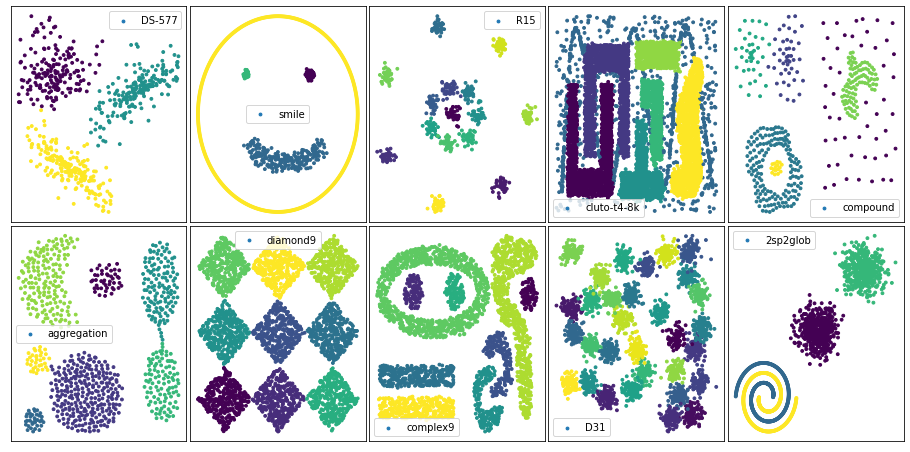

In [78]:
# Graficas datos sinteticos
n,m=2,5
descs=[]
fig, axes=plt.subplots(n,m, figsize=(16,8))
for i,ds in enumerate(sdata):
    nom=ds.split('/')[-1].split('.')[0]
    ddf=pd.DataFrame(arff.loadarff(ds)[0])
    y,X=ddf['class'].values,ddf.drop(columns=['class']).values
    lc=list(set(y))
    c=[lc.index(l) for l in y]
    ax=axes[i//m,i%m]
    ax.scatter(X[:,0],X[:,1],c=c,s=8,label=nom)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.legend()
    descs.append({'Dataset':nom,'Dimension':X.shape[1], '# ejemplos':X.shape[1], '# clases':len(lc),
                 'Entropia': entropy(y)})
descs=pd.DataFrame(descs)
plt.subplots_adjust(wspace=0.02,hspace=0.02)


In [79]:
descs

,Dataset,Dimension,# ejemplos,# clases,Entropia
0,DS-577,2,2,3,0.9990
1,smile,2,2,4,0.8402
2,R15,2,2,15,1.0000
3,cluto-t4-8k,2,2,7,0.9581
4,compound,2,2,6,0.8731
5,aggregation,2,2,7,0.8709
6,diamond9,2,2,9,1.0000
7,complex9,2,2,9,0.8636
8,D31,2,2,31,1.0000
9,2sp2glob,2,2,4,1.0000


In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

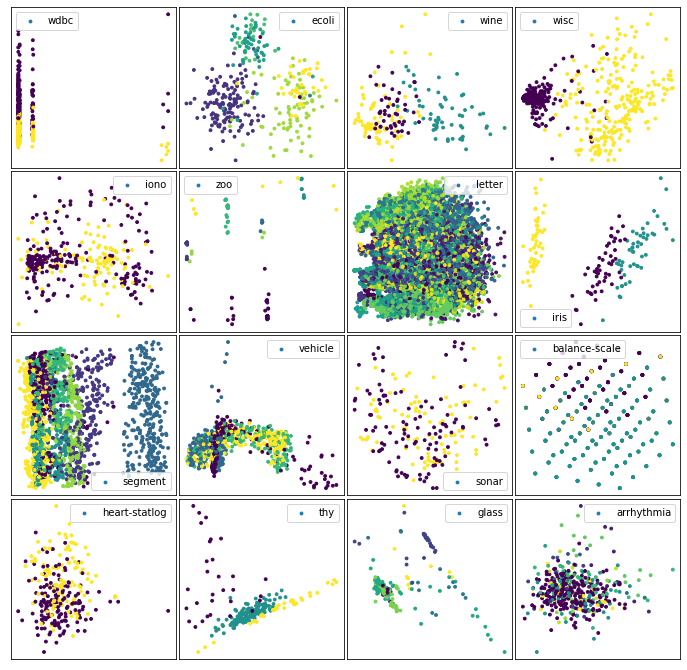

In [80]:
# Graficas datos reales
n,m=4,4
fig, axes=plt.subplots(n,m, figsize=(12,12))
descr=[]
for i,ds in enumerate(rdata):
    nom=ds.split('/')[-1].split('.')[0]
    ddf=pd.DataFrame(arff.loadarff(ds)[0])
    y,X=ddf['class'].values,ddf.drop(columns=['class']).values
    pca = PCA(n_components=2)
    #tsne = TSNE(n_components=2,random_state=5)
    Xp=pca.fit_transform(X)
    lc=list(set(y))
    c=[lc.index(l) for l in y]
    ax=axes[i//m,i%m]
    ax.scatter(Xp[:,0],Xp[:,1],c=c,s=8,label=nom)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.legend()
    descr.append({'Dataset':nom,'Dimension':X.shape[1], '# ejemplos':X.shape[1], '# clases':len(lc),
                 'Entropia': entropy(y)})
descr=pd.DataFrame(descr)
plt.subplots_adjust(wspace=0.02,hspace=0.02)

In [81]:
descr

,Dataset,Dimension,# ejemplos,# clases,Entropia
0,wdbc,31,31,2,0.9526
1,ecoli,7,7,8,0.7296
2,wine,13,13,3,0.9886
3,wisc,9,9,2,0.9293
4,iono,34,34,2,0.9418
5,zoo,16,16,7,0.8515
6,letter,16,16,26,0.9999
7,iris,4,4,3,1.0000
8,segment,19,19,7,1.0000
9,vehicle,18,18,4,0.9995
